<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #001127ff, #003984ff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       W2 C1 Day 20/8
    </h1>
</div>


<h4 style="color:#0E78FE">1. Importing OS, Base64, TensorFlow, Matplotlib, and Random Libraries</h4>

In [28]:
import os
import base64
import tensorflow as tf
import matplotlib.pyplot as plt
import random

<h4 style="color:#0E78FE">2. Loading and Displaying Information About the MNIST Dataset</h4>

In [19]:
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "data/mnist.npz")
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.mnist.load_data()

print(f"training_images is of type {type(training_images)}.\ntraining_labels is of type {type(training_labels)}\n")

data_shape = training_images.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

training_images is of type <class 'numpy.ndarray'>.
training_labels is of type <class 'numpy.ndarray'>

There are 60000 examples with shape (28, 28)


<h4 style="color:#0E78FE">3. Normalizing Training Images to Range [0,1]</h4>

In [20]:
training_images = training_images / 255.0

<h4 style="color:#0E78FE">4. Creating and Compiling a Neural Network Model for MNIST Classification</h4>

In [21]:
def create_and_compile_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

<h4 style="color:#0E78FE">5. Initializing an Untrained MNIST Classification Model</h4>

In [22]:
untrained_model = create_and_compile_model()


<h4 style="color:#0E78FE">6. Generating Predictions with the Untrained Model and Checking Output Shape</h4>

In [23]:
predictions = untrained_model.predict(training_images[:5], verbose=False)
print(f"predictions have shape: {predictions.shape}")

predictions have shape: (5, 10)


<h4 style="color:#0E78FE">7. Defining a Custom EarlyStopping Callback to Halt Training at 98% Accuracy</h4>

In [24]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.98:
            self.model.stop_training = True
            print("\nReached 98% accuracy so cancelling training!")

<h4 style="color:#0E78FE">8. Training the MNIST Model with EarlyStopping Callback</h4>

In [25]:
def train_mnist(training_images, training_labels):
    model = create_and_compile_model()
    history = model.fit(training_images, training_labels, epochs=10, callbacks=[EarlyStoppingCallback()], verbose=1)
    return history
training_history = train_mnist(training_images, training_labels)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9276 - loss: 0.2546
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9675 - loss: 0.1109
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0764
Epoch 4/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9830 - loss: 0.0566
Reached 98% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0579


<h4 style="color:#0E78FE">9. Decoding and Printing a Base64-Encoded Answer</h4>

In [26]:
encoded_answer = "CiAgIC0gQSB0Zi5rZXJhcy5JbnB1dCB3aXRoIHRoZSBzYW1lIHNoYXBlIGFzIHRoZSBpbWFnZXMKICAgLSBBIEZsYXR0ZW4gbGF5ZXIKICAgLSBBIERlbnNlIGxheWVyIHdpdGggNTEyIHVuaXRzIGFuZCBSZUxVIGFjdGl2YXRpb24gZnVuY3Rpb24KICAgLSBBIERlbnNlIGxheWVyIHdpdGggMTAgdW5pdHMgYW5kIHNvZnRtYXggYWN0aXZhdGlvbiBmdW5jdGlvbgo=="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)


   - A tf.keras.Input with the same shape as the images
   - A Flatten layer
   - A Dense layer with 512 units and ReLU activation function
   - A Dense layer with 10 units and softmax activation function



<h4 style="color:#0E78FE">10. Displaying a Random Training Image from the MNIST Dataset with Its Label</h4>

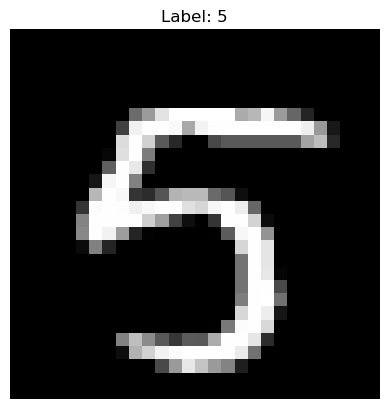

In [29]:
idx = random.randint(0, len(training_images)-1)
plt.imshow(training_images[idx], cmap="gray")
plt.title(f"Label: {training_labels[idx]}")
plt.axis("off")
plt.show()